### Receiver Operation Characteristic Curve  
描述TPR和FPR之间的关系

召回率  
TPR = recall = TP / (TP + FN)  
TPR = Recall

FPR: false positive rate  
FPR = FP / (TN + FP)

In [ ]:
# metrics.py
import numpy as np
def TN(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==0) & (y_predict==0))

def FP(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==0) & (y_predict==1))

def FN(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==1) & (y_predict==0))

def TP(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==1) & (y_predict==1))

def confusion_matrix(y_true,y_predict):
    return np.array([
        [TN(y_test,y_log_predict),FP(y_test,y_log_predict)],
        [FN(y_test,y_log_predict),TP(y_test,y_log_predict)]
    ])

def precision_score(y_true,y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp /(tp+fp)
    except:
        return 0.0

def recall_score(y_true,y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp /(tp+fn)
    except:
        return 0.0

def f1_score(precision,recall):
    precision = precision_score(y_true,y_predict)
    recall = recall_score(y_true, y_predict)
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

def TPR(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp/(tp+fn)
    except:
        return 0.0

def FPR(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp/(fp+tn)
    except:
        return 0.0

## ROC曲线
x轴：FPR  
y轴：TPR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()


y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
decision_scores = log_reg.decision_function(X_test)

C:\Users\Ruojun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
from playML.metrics import FPR,TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores))
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype = 'int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))


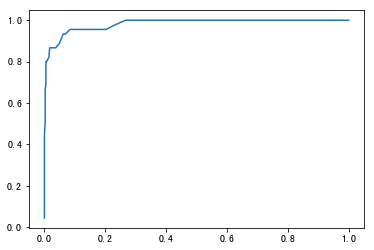

In [8]:
plt.plot(fprs, tprs)
plt.show()

### scikit-learn中的ROC

In [9]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

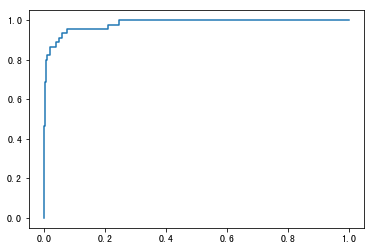

In [10]:
plt.plot(fprs, tprs)
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,decision_scores)

0.9830452674897119

# 多分类问题中的混淆矩阵

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target #10分类问题

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\Users\Ruojun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ruojun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9555555555555556

In [5]:
y_predict = log_reg.predict(X_test)

In [6]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average='micro')

0.9555555555555556

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 49,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  1,  0,  1,  1,  1,  0,  0,  0, 41]], dtype=int64)

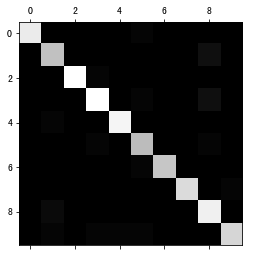

In [10]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm,cmap=plt.cm.gray)
plt.show()

In [11]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0 )
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.025     , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

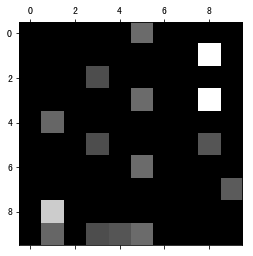

In [12]:
plt.matshow(err_matrix,cmap=plt.cm.gray)
plt.show()
# 越亮的地方犯的错误越多